In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Separate 20% of the data for testing
For model evaluation on totally unseen data

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,No
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6308-CQRBU,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.25,7707.7,No
5630,2842-JTCCU,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),46.05,80.35,Yes
5631,6402-ZFPPI,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,102.80,2660.2,Yes
5632,3594-BDSOA,Female,0,Yes,No,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.40,482.8,No


In [6]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


None

- We can notice that 'TotalCharges' column is of wrong type

## Data Cleaning

1. **Converting 'TotalCharges' column to numeric**

In [7]:
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')

2. **Check and handling missing values**

In [8]:
train_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

8 Null values in 'TotalCharges' column

- Fill with Mean value

In [9]:
train_df['TotalCharges'].fillna((train_df['TotalCharges'].mean()), inplace=True)

3. **Check for duplicates**

In [10]:
train_df.duplicated().sum()

np.int64(0)

No duplicates were found

## Exploratory Data Analysis

**Distribution of target column:**

Churn
No     4139
Yes    1495
Name: count, dtype: int64


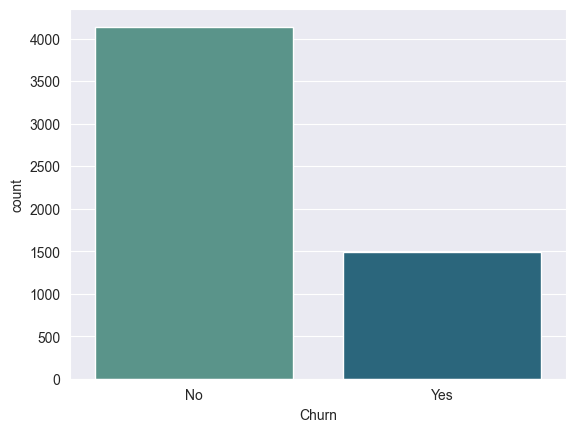

In [11]:
print(train_df['Churn'].value_counts())
_ = sns.countplot(x='Churn', data=train_df, palette='crest')

- The distribution of the binary classes shows a slight data imbalance that needs attention

**Categorical features count plot**

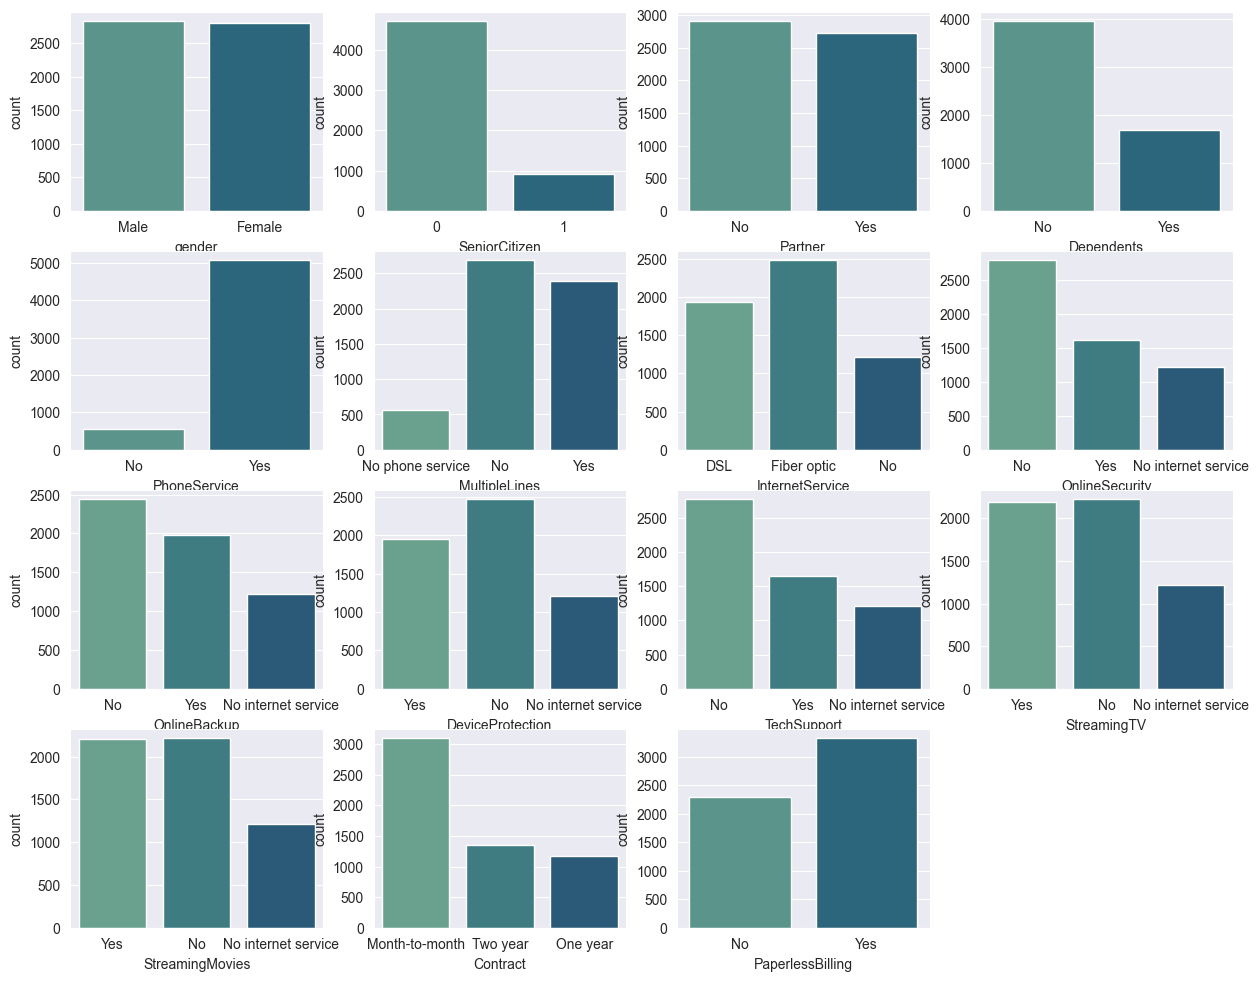

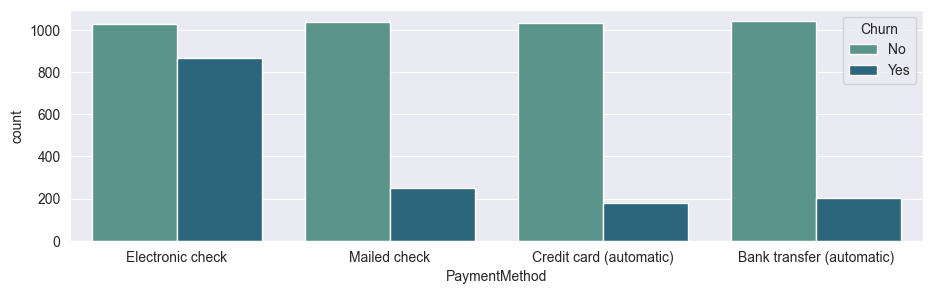

<Figure size 640x480 with 0 Axes>

In [12]:
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=train_df, x=train_df[variable], ax=ax, palette='crest')
plt.show() 
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=train_df, palette='crest')
plt.show() 
plt.tight_layout()

- The gender count plot shows an equally distribution of males and females in the dataset
- Some features have 'No' and 'No Internet Service' or 'No Phone Service' as a separate category which don't give new info and could all be considered as 'No' label

**Histogram & Boxplots of continous features**

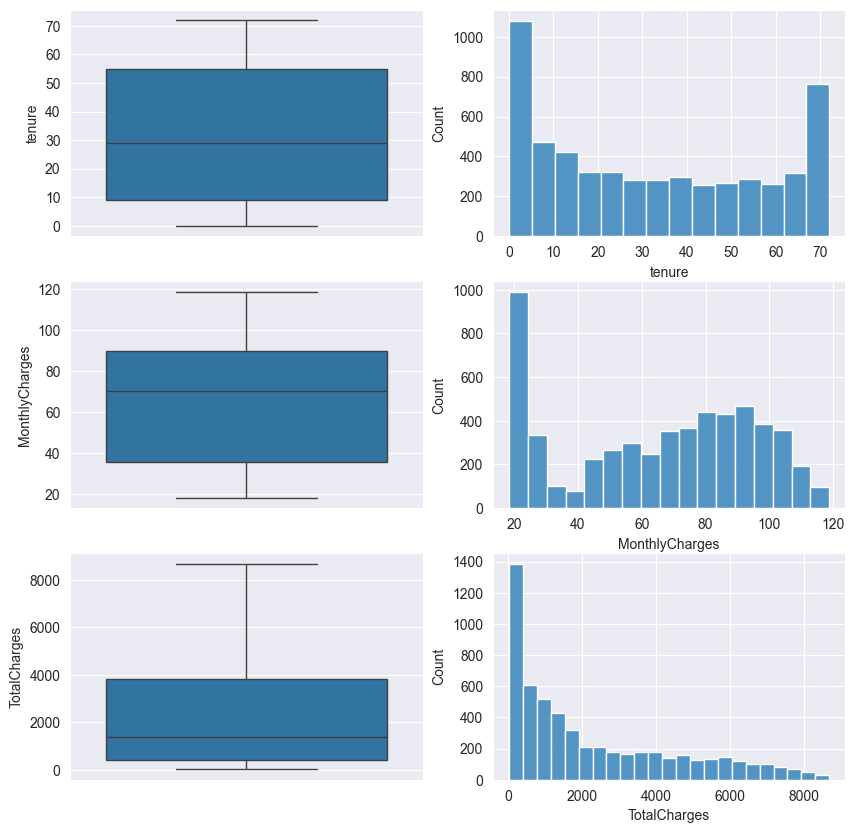

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
_ = sns.boxplot(y= train_df['tenure'])
plt.subplot(3, 2, 2)
_ = sns.histplot(x='tenure', data=train_df)

plt.subplot(3, 2, 3)
_ = sns.boxplot(y= train_df['MonthlyCharges'])
plt.subplot(3, 2, 4)
_ = sns.histplot(x='MonthlyCharges', data=train_df)

plt.subplot(3, 2, 5)
_ = sns.boxplot(y= train_df['TotalCharges'])
plt.subplot(3, 2, 6)
_ = sns.histplot(x='TotalCharges', data=train_df)

- Boxplots show that there are No outliers in the continuous variables
- Histograms show right skewness in the 'TotalCharges' feature

**Scatter plot of Monthly Charges versus Total Charges**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

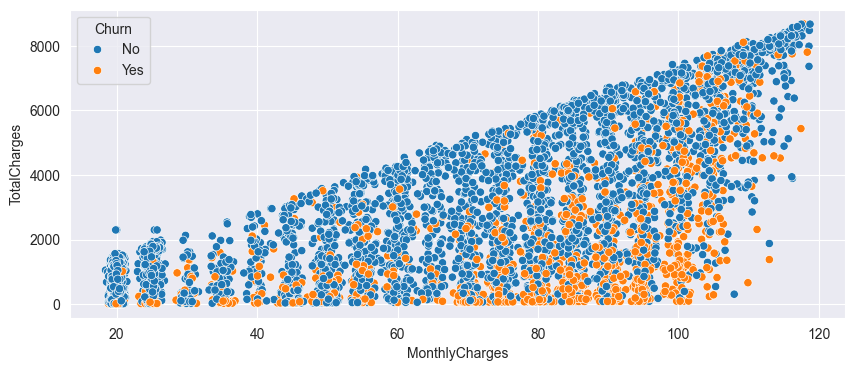

In [14]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=train_df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

- This implies a positive correlation between the monthly charges, and total charges.
- The churn rate increases with the increase in monthly charges.

**Replacing 'No internet service' and 'No phone service' with 'No'**

In [15]:
train_df.replace(['No internet service','No phone service'], 'No', inplace=True)

## Encoding categorical features
- One-Hot encoding all categorical features
- Encode by mapping target feature

In [16]:
# One-hot encoding
cat_cols = ['gender', 'InternetService','PaymentMethod','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 
          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

train_df = pd.concat([train_df, pd.get_dummies(train_df[cat_cols])], axis='columns')
train_df = train_df.drop(columns=cat_cols)

# mapping 
train_df['Churn'] = np.where(train_df['Churn'] == 'Yes', 1, 0)  # yes=1, No=0

## Feature engineering

1. **Binning 'tenure' feature into 6 ranges**

In [17]:
condition = [((train_df.tenure >= 0)&(train_df.tenure <= 12)), ((train_df.tenure > 12)&(train_df.tenure <= 24)), 
             ((train_df.tenure > 24)&(train_df.tenure <= 36)),((train_df.tenure > 36)&(train_df.tenure <= 48)),
             ((train_df.tenure > 48)&(train_df.tenure <= 60)), (train_df.tenure > 60)]

#choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
choice = [0,1, 2, 3, 4, 5]
train_df['tenure_range'] = np.select(condition, choice)

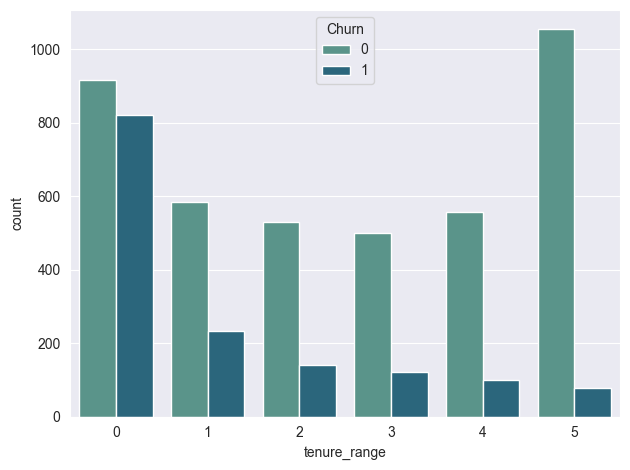

In [18]:
_ = sns.countplot(x= 'tenure_range', hue='Churn', data=train_df, palette='crest', order=choice)
plt.tight_layout()

- We can notice that customers who stay longer are more loyal to the company and very small number who leave after staying more than 4 years. On the other hand, customers churn rate is very high during the first year.

## Feature Scaling

- Log transform

In [19]:
train_df['MonthlyCharges']=np.log1p(train_df['MonthlyCharges'])
train_df['TotalCharges']=np.log1p(train_df['TotalCharges'])

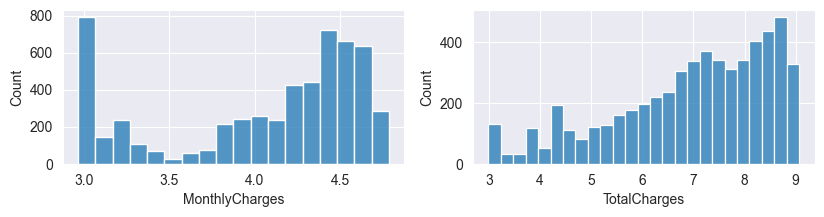

In [20]:
plt.figure(figsize=(15,2))
plt.subplot(1, 3, 2)
_ = sns.histplot(x='MonthlyCharges', data=train_df)

plt.subplot(1, 3, 3)
_ = sns.histplot(x='TotalCharges', data=train_df)

## Handling data imbalance

In [21]:
X_train = train_df.drop(columns=['customerID','Churn'])
y_train = train_df['Churn']

In [22]:
sm = SMOTE(random_state = 0, sampling_strategy = 'minority', k_neighbors= 5)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

ValueError: could not convert string to float: 'Month-to-month'

In [ ]:
_ = sns.countplot(x=y_train, palette='crest')

### Preprocessing function on Test set
A function is created to apply all previous preprocessing steps on the test set

In [ ]:
def test_prep (test_df):
    ### Data cleaning
    #Converting 'TotalCharges' column to numeric
    test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')
    
    #Replacing 'No internet service' and 'No phone service' with 'No'
    test_df.replace(['No internet service','No phone service'], 'No', inplace=True)
    
    # if there is null values in the continous features --> fill with the mean of columns in training set (mapping)
    for col in test_df.columns:
        if test_df[col].isna().sum() > 0:
            test_df[col] = test_df[col].fillna(train_df[col].map(np.mean))
            
    ### Categorical features encoding 
    test_df = pd.concat([test_df, pd.get_dummies(test_df[cat_cols])], axis='columns')
    test_df = test_df.drop(columns=cat_cols)
    
    test_df['Churn'] = np.where(test_df['Churn'] == 'Yes', 1, 0)
            
    ### Feature engineering
    #Binning 'tenure' feature into 6 ranges
    condition = [((test_df.tenure >= 0)&(test_df.tenure <= 12)), ((test_df.tenure > 12)&(test_df.tenure <= 24)), 
                 ((test_df.tenure > 24)&(test_df.tenure <= 36)),((test_df.tenure > 36)&(test_df.tenure <= 48)),
                 ((test_df.tenure > 48)&(test_df.tenure <= 60)), (test_df.tenure > 60)]
    #choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
    choice = [0,1, 2, 3, 4, 5]
    test_df['tenure_range'] = np.select(condition, choice)
    
    ### Feature Scaling
    test_df['MonthlyCharges']=np.log1p(test_df['MonthlyCharges'])
    test_df['TotalCharges']=np.log1p(test_df['TotalCharges'])
    
    return test_df

In [ ]:
test_df = test_prep(test_df)
test_df

In [ ]:
X_test = test_df.drop(columns=['customerID','Churn'])
y_test = test_df['Churn']

## Model training
Trainig different models on the data to compare results of each model

1. **Logistic Regression**

In [ ]:
model_logReg = LogisticRegression(C=200, max_iter=1000)

scores = cross_val_score(model_logReg, X_train, y_train, cv=10, scoring="f1")
print(scores)
model_logReg.fit(X_train, y_train)

**Testing the model**

In [ ]:
log_pred = model_logReg.predict(X_test)

- **Confusion matrix**

In [ ]:
cm = confusion_matrix(log_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

- **Classification report**

In [ ]:
print(classification_report(y_test, log_pred, target_names=['No', 'Yes']))

In [ ]:
def estimate_ewaste_mn_over_l(device_weight, num_devices, lifetime):
    """
    Calculates e-waste using the formula:
        E = (M * N) / L

    device_weight (M): weight of one device in kg
    num_devices   (N): number of devices
    lifetime      (L): lifetime or length of service (years or months)
    """
    if lifetime <= 0:
        raise ValueError("Lifetime (L) must be greater than zero.")

    E = (device_weight * num_devices) / lifetime
    return E

# Example
M = 0.8      # kg per device
N = 1000       # number of devices
L = 3        # years of service

ewaste = estimate_ewaste_mn_over_l(M, N, L)
print(f"E-waste: {ewaste:.4f} kg per year")

## 2- SVM model

In [ ]:
model_svm = SVC(kernel='linear', C=20)
scores = cross_val_score(model_logReg, X_train, y_train, cv=10, scoring="f1")
print(scores)

model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

num_predicted_churn = sum(y_pred)
print("Predicted churned customers:", num_predicted_churn)

estimate_ewaste(num_predicted_churn)
print(f"Estimated e-waste: {ewaste:.2f} kg ({ewaste/1000:.2f} tons)")



In [ ]:
# One-hot encode categorical columns
X_all = pd.get_dummies(pd.concat([X_train, X_test]), drop_first=True)
X_train = X_all.iloc[:len(X_train), :]
X_test = X_all.iloc[len(X_train):, :]

**Testing the model**

In [ ]:
svm_pred = model_svm.predict(X_test)

- **Confusion matrix**

In [ ]:
cm = confusion_matrix(svm_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

- **Classification report**

In [ ]:
print(classification_report(y_test, svm_pred, target_names=['No', 'Yes']))

## 3- XGBoost model

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [1.5, 2, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [ 4, 5, 8]
        }

model_xgb = xgb.XGBClassifier(learning_rate= 0.08, n_estimators=100, objective='binary:logistic', silent=True, verbose=-1)

skf = StratifiedKFold(n_splits= 5, shuffle = True, random_state = 0)
random_search = RandomizedSearchCV(model_xgb, param_distributions=params, n_iter=5, scoring='roc_auc', 
                                   n_jobs=2,cv=skf.split(X_train, y_train), verbose=-1, random_state=0)

_= random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

**Testing the model**

In [ ]:
xgb_pred = random_search.predict(X_test)

- **Confusion matrix**

In [ ]:
cm = confusion_matrix(xgb_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

- **Classification report**

In [ ]:
print(classification_report(y_test, xgb_pred, target_names=['No', 'Yes']))

## 4- MLP model

In [ ]:
model_mlp= MLPClassifier(random_state=1, max_iter=500)
scores = cross_val_score(model_mlp, X_train, y_train, cv=10, scoring="f1")
print(scores)

model_mlp.fit(X_train, y_train)

**Testing the model**

In [ ]:
mlp_pred = model_mlp.predict(X_test)

- **Confusion matrix**

In [ ]:
cm = confusion_matrix(mlp_pred, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

- **Classification report**

In [ ]:
print(classification_report(mlp_pred,y_test, target_names=['No', 'Yes']))